# Why estimate $f$?

## Prediction

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

We can think of a given dataset upon which we are working as a representation of some actual phenomenon. We can imagine there to be some sort of "universal" function, $f$, that was used to generate the data, one that we can never truly know.

As data scientists, we will seek to estimate this function. We will call our estimate $\hat{f}$ ("eff hat").

## Why estimate $f$?

There are two main reasons we might want to estimate $f$ with $\hat{f}$:

- prediction
   - given some set of known inputs and known outputs, we may wish to create some function that can take a new set of inputs and predict what the output would be for these inputs
- inference
   - given some set of known inputs and (optionally) known outputs, we may wish to understand how the inputs (and outputs) interact with each other

In [3]:
%pwd

'/home/citomcclure/uclax-data-science/01-iris-03-why-estimate-f'

### What does `pwd` tell us? What does this mean in the context of a Jupyter Notebook? Why would it be important to think about this before we load a csv file?

pwd stands for "print work directory" and helps us to know where we are currently pointing to while using bash (within Jupyter). In the context of Jupyter, this meands that our "~" or root/home would be the files we have currently on Jupyter which extends further to the docker and ubuntu instances our notebooks sit on. It's important to know this in case we would like to use the file for other notebooks (not having it drilled so far down and virtually inaccessible) as well as making sure we know where we are saving/loading the csv file for other future reference.

In [4]:
%cd ..

/home/citomcclure/uclax-data-science


In [5]:
%ls

00-introduction/          01-iris-02-numerical-python/  README.md
01-iris-01-introduction/  01-iris-03-why-estimate-f/


## The Iris Dataset

Let us consider the Iris dataset.

In [6]:
%ls 01-iris-02-numerical-python/

02-ipython-magic.ipynb  03-the-python-numerical-stack.ipynb  data/  src/


In [7]:
%ls 01-iris-02-numerical-python/data

iris.csv  petal_width_prediction_1_var.npy


In [9]:
%mkdir -p 01-iris-03-why-estimate-f/data

In [10]:
%ls

00-introduction/          01-iris-02-numerical-python/  data/
01-iris-01-introduction/  01-iris-03-why-estimate-f/    README.md


In [11]:
%cd 01-iris-02-numerical-python/

/home/citomcclure/uclax-data-science/01-iris-02-numerical-python


In [12]:
%ls

02-ipython-magic.ipynb  03-the-python-numerical-stack.ipynb  data/  src/


In [13]:
%cd data/

/home/citomcclure/uclax-data-science/01-iris-02-numerical-python/data


In [14]:
%ls

iris.csv  petal_width_prediction_1_var.npy


In [16]:
%cp iris.csv /home/citomcclure/uclax-data-science/01-iris-03-why-estimate-f/

In [18]:
%pwd

'/home/citomcclure/uclax-data-science/01-iris-02-numerical-python/data'

In [19]:
%cp iris.csv /home/citomcclure/uclax-data-science/01-iris-03-why-estimate-f/data/

In [20]:
%cd ..
%cd ..

/home/citomcclure/uclax-data-science/01-iris-02-numerical-python
/home/citomcclure/uclax-data-science


In [21]:
%cd 01-iris-03-why-estimate-f/


/home/citomcclure/uclax-data-science/01-iris-03-why-estimate-f


### Copy (`cp`) the data into this project (`01-iris-03-why-estimate-f`) into a folder called `data`

### Find the iris data and update the variable below

In [22]:
IRIS_DATA_LOCATION = 'data/iris.csv'

In [23]:
### v--- SHHH, THERE'S A SECRET TEST HERE


In [24]:
iris_df = pd.read_csv(IRIS_DATA_LOCATION, index_col=0)

### What library did we use to load the csv? What does the argument `index_col=0` do?

pandas! index_col=0 is an argument that tells the load function which column to use as the row labels; in this case, the first row.

In [25]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
iris_df.head()
# iris_df.sample(5) would take 5 random samples

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Figure size 1440x720 with 0 Axes>

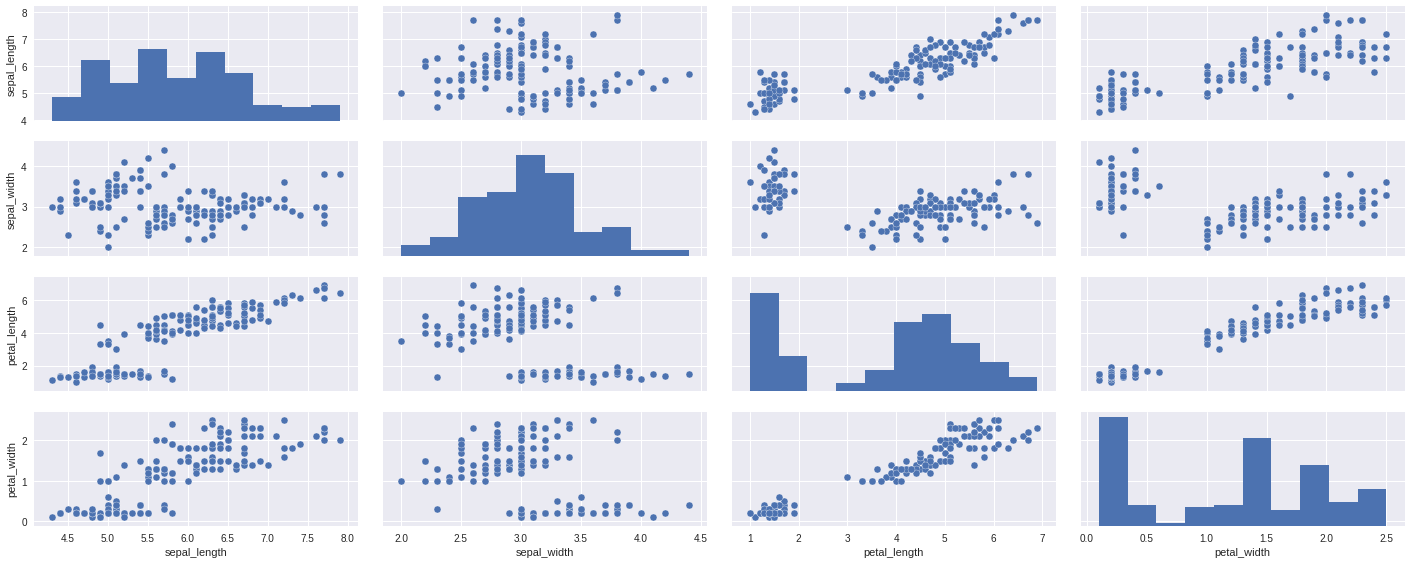

In [34]:
plt.figure(1, (20,10)) #not sure what these arguments are, changing them has no effect on plots

sns.pairplot(iris_df, size=2, aspect=2.5)

Having a look at the pair plot, we might say that we are able to predict petal width if we know petal length.

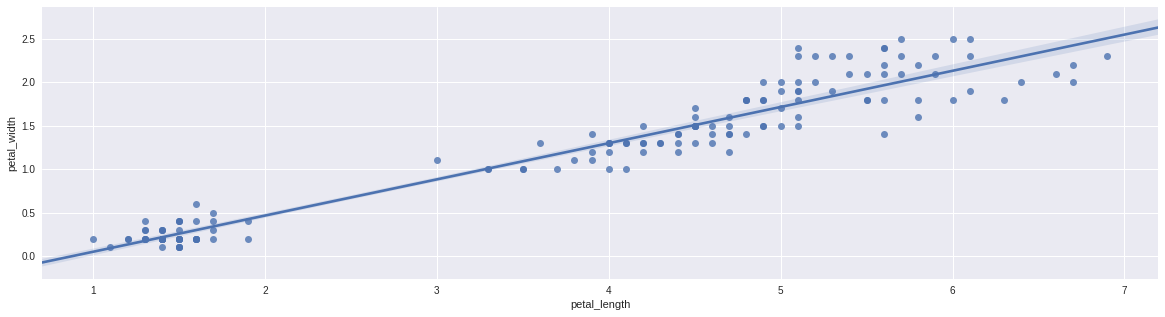

In [41]:
plt.figure(1, (20,5))

sns.regplot('petal_length', 'petal_width', data=iris_df)

## Linear Regression

We might build a **simple regression model** to do this for us using scikit-learn. Here, the **input variable** would be `petal length` and the **output variable** would be `petal width`.

We will usually refer to our input variable(s) as **feature(s)** and our output variable as the **target**.

### Build a Simple Regression Model

In [35]:
from patsy import dmatrices

target, features = dmatrices("petal_width ~ petal_length", iris_df)
# target, features = dmatrices("petal_width ~ 1 + petal_length", iris_df) is more explicit

# is going to use the data frame at the end (iris) to look for petal_width and make that the column (the target), then look
# through dataset for petal_length as row (the features)

In [37]:
target.shape, features.shape

((150, 1), (150, 2))

In [40]:
features[:5]

array([[ 1. ,  1.4],
       [ 1. ,  1.4],
       [ 1. ,  1.3],
       [ 1. ,  1.5],
       [ 1. ,  1.4]])

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linear_regression_model = LinearRegression(fit_intercept=False)
linear_regression_model.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

## Plot the Results

Having prepared the regression model, we use it to make predictions.

We then plot the predictions versus the actual values.


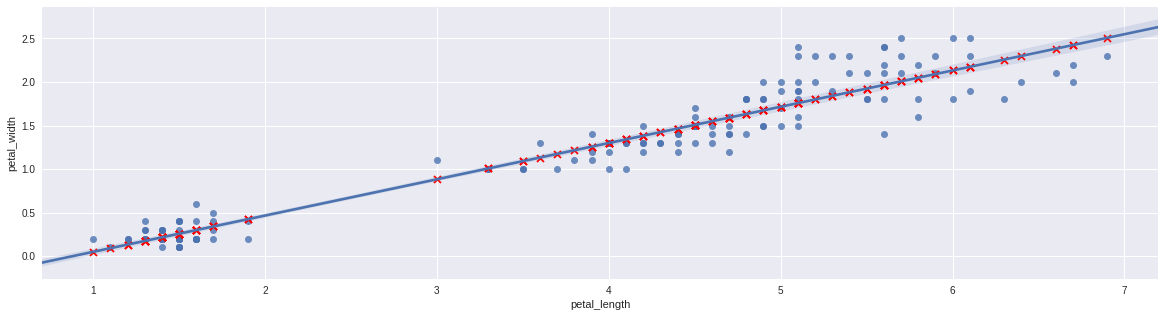

In [44]:
plt.figure(1, (20,5))

sns.regplot('petal_length', 'petal_width', data=iris_df)

predictions = linear_regression_model.predict(features)
plt.scatter(iris_df.petal_length, predictions, marker='x', color='red')

### What does this plot show us? 

After the data is passed through the linear regression model, the best fit trendline, the blue line, is created and the predicted y values with their corresponding x values are shown. Only data points with recorded petal_lengths have red x's shown. This overlays the original data which is shown with the blue dots.